# Applying Seeding Function for reproducibility

In [1]:
from numpy.random import seed

In [2]:
seed(1)

# Importing necessary libraries

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Loading Training Data

In [4]:
data=pd.read_csv("Customer_attrition/Train.csv")

In [5]:
data.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,50,1,1,6.0,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,49,0,1,9.0,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,34,0,2,5.0,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


# Data Preprocessing and Cleaning

In [6]:
# Printing the shape of the column 

print("The dimensions of the dataset is : {}".format(data.shape))

The dimensions of the dataset is : (7000, 24)


In [7]:
# Investigating Nan Values in dataset

features_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>=1]
for feature in features_with_nan:
    print(feature,np.round(data[feature].isnull().mean(),4),'%missing values')

Age 0.0589 %missing values
Time_of_service 0.0206 %missing values
Pay_Scale 0.0013 %missing values
Work_Life_balance 0.0016 %missing values
VAR2 0.0824 %missing values
VAR4 0.0937 %missing values


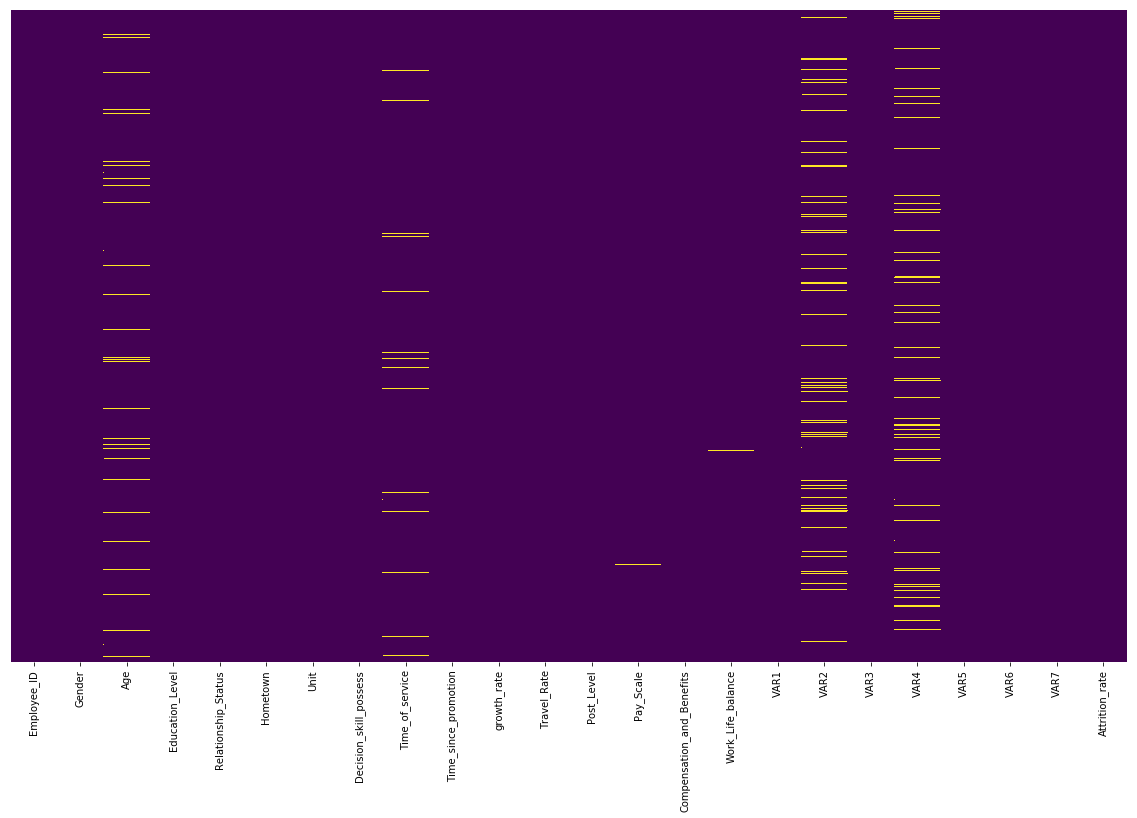

In [8]:
# Visualizing missing values
plt.figure(figsize=(20,12))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

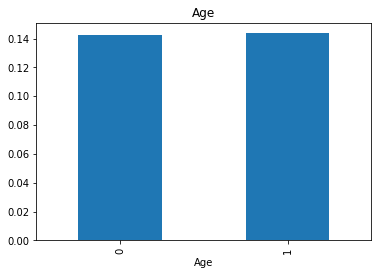

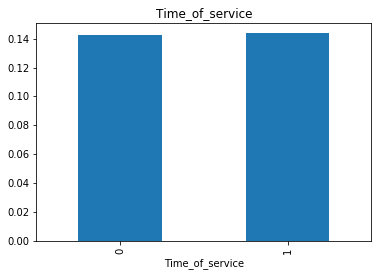

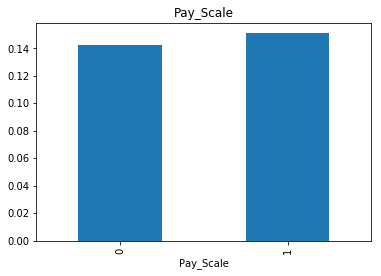

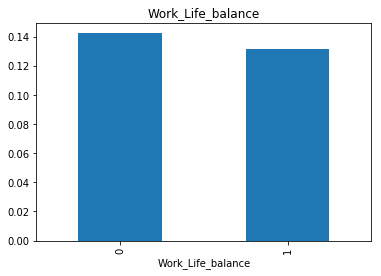

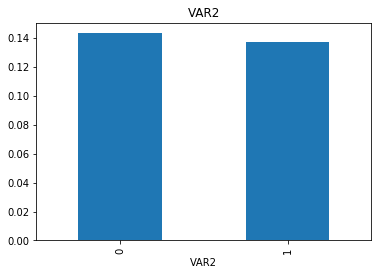

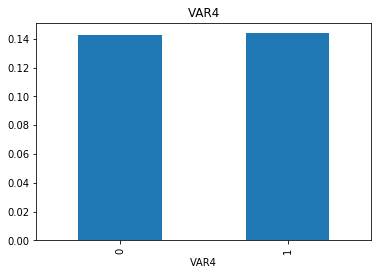

In [9]:
# Understanding the relationship between missing values and target
for feature in features_with_nan:
    data_copy = data.copy()
    data_copy[feature] = np.where(data[feature].isnull(),1,0)
    data_copy.groupby(feature)['Attrition_rate'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Since most of the computed missing variables vary with target variables, therefore, they will be considered for predictions.

In [14]:
# Numerical Variables in dataset

numerical_feature = [feature for feature in data.columns if data[feature].dtype!='O']
print("The number of numerical features are: {}".format(len(numerical_feature)))
data[numerical_feature].head()

The number of numerical features are: 17


,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [15]:
# Discrete variables in Numerical features
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25 and feature not in ['Attrition_rate'] ]
print("The number of discrete variables is: {}".format(len(discrete_feature)))

The number of discrete variables is: 13


In [16]:
data[discrete_feature].head()

,Education_Level,Time_since_promotion,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,4,4,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3
1,3,4,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,3,3,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,3,3,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,1,4,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2


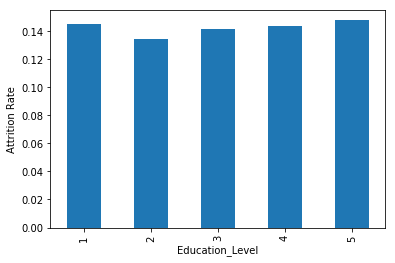

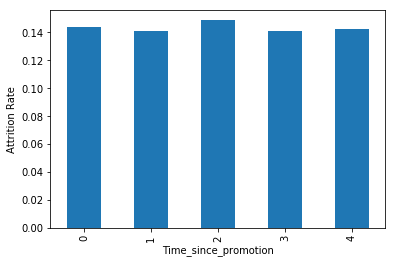

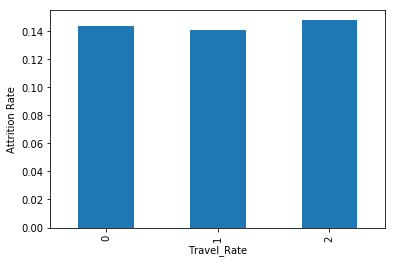

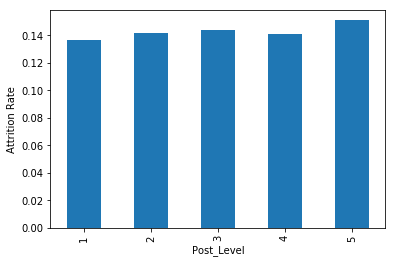

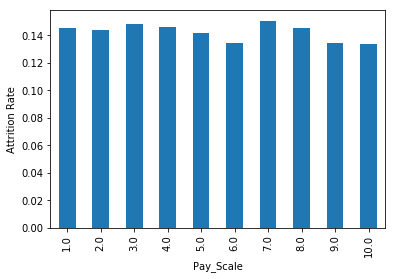

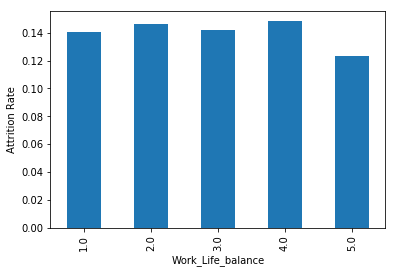

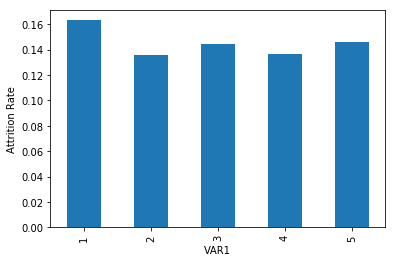

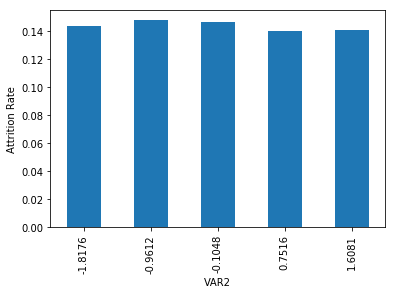

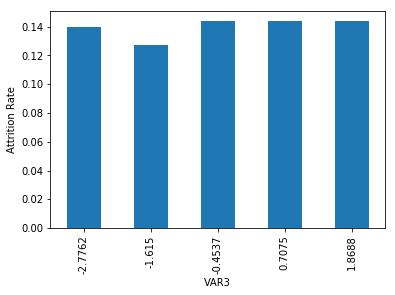

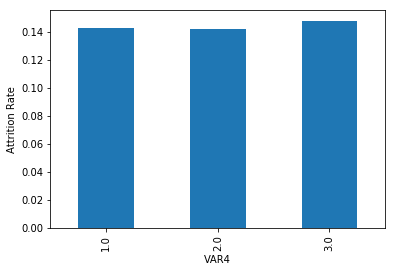

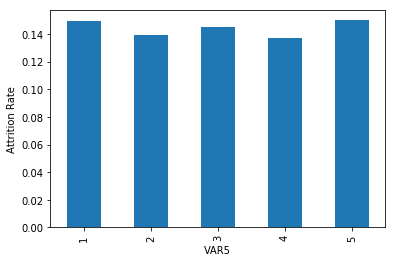

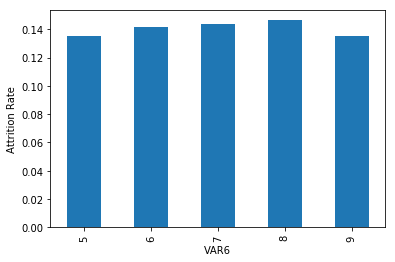

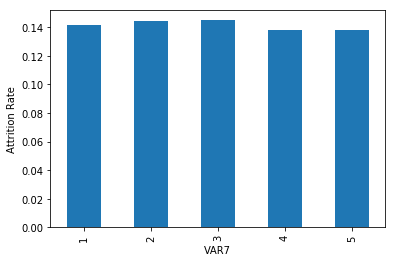

In [17]:
#Relationship between discrete and target
for feature in discrete_feature:
    data_copy = data.copy()
    data_copy.groupby(feature)['Attrition_rate'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Attrition Rate')
    plt.show()

In [18]:
# Continuous Distribution

continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("The number of continuous feature is:{} ".format(len(continuous_feature)))

The number of continuous feature is:4 


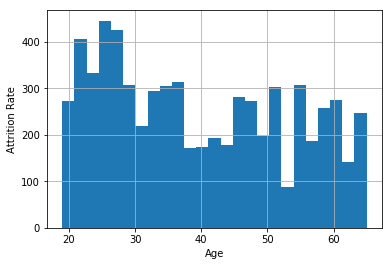

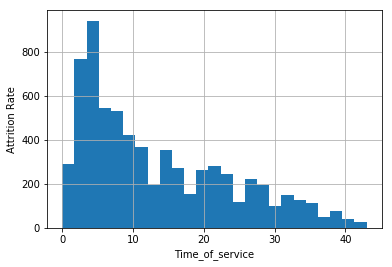

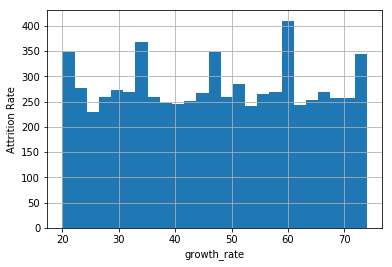

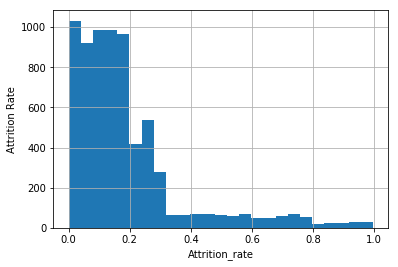

In [19]:
# Relationship between continous and target variable
for feature in continuous_feature:
    data_copy = data.copy()
    data_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Attrition Rate')
    plt.show()

c:\users\cooldude\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


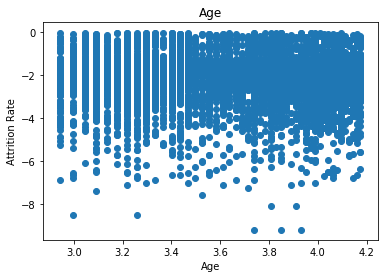

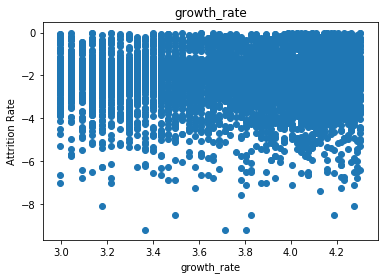

In [17]:
# We will apply log normal Distribution 
for feature in continuous_feature:
    data_copy = data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature] = np.log(data_copy[feature])
        data_copy['Attrition_rate'] = np.log(data_copy['Attrition_rate'])
        plt.scatter(data_copy[feature],data_copy['Attrition_rate'])
        plt.xlabel(feature)
        plt.ylabel('Attrition Rate')
        plt.title(feature)
        plt.show()

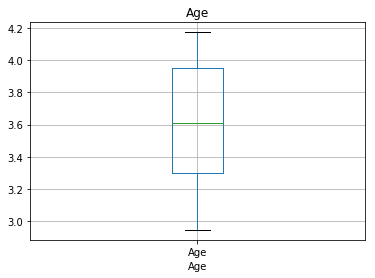

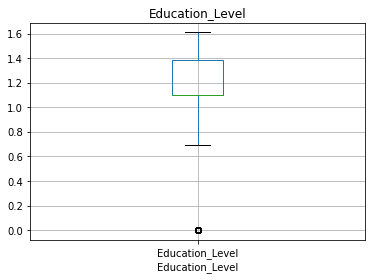

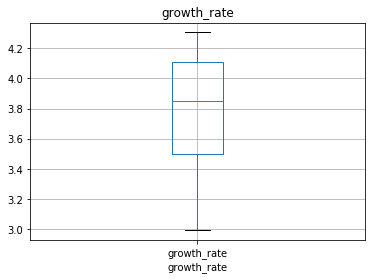

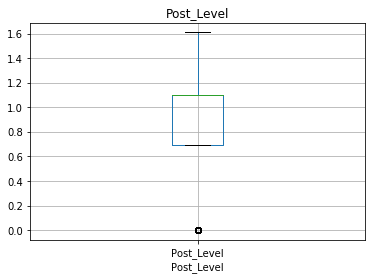

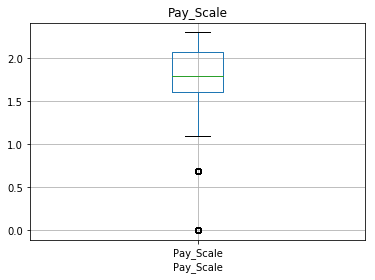

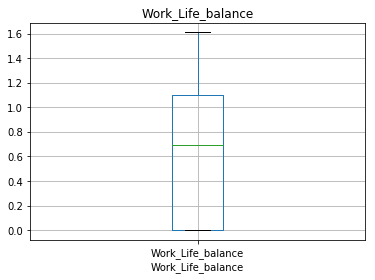

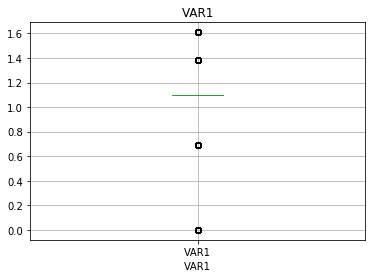

c:\users\cooldude\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


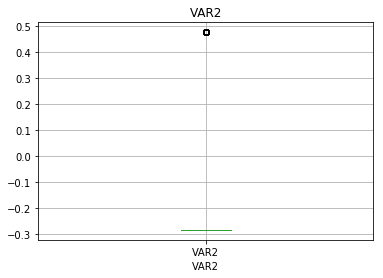

c:\users\cooldude\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


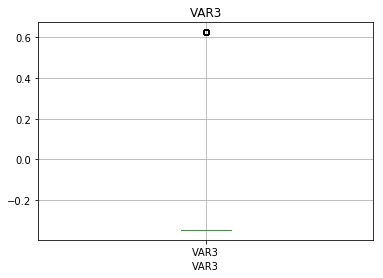

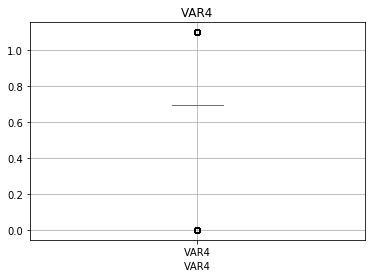

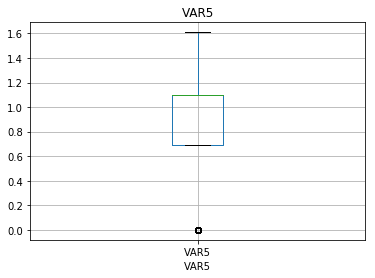

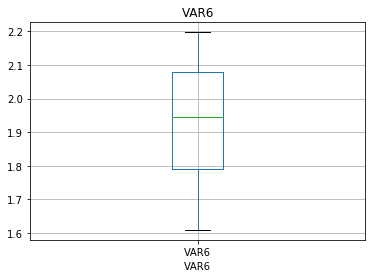

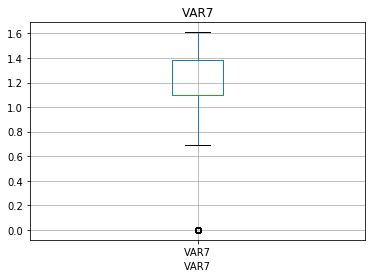

In [18]:
#Outliers

for feature in numerical_feature:
    data_copy = data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature] = np.log(data_copy[feature])
        data_copy.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

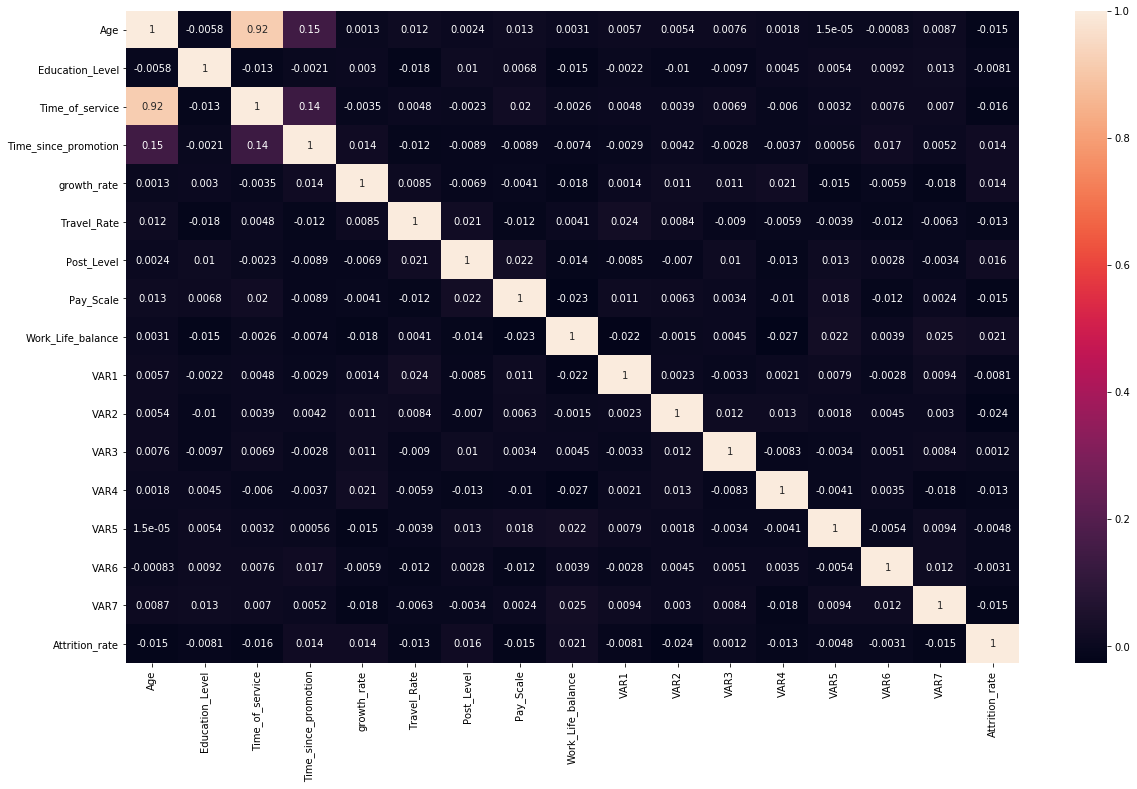

In [19]:
# Computing the correlation of variables
plt.figure(figsize=(20,12))
sns.heatmap(data[numerical_feature].corr(),annot=True)

### It appears that variables Age and Time_of_service are correlated. It can be a useful information in prediction

In [20]:
# Categorical Features
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("The number of categorical features are : {}".format(len(categorical_feature)))

The number of categorical features are : 7


In [21]:
data[categorical_feature].head()

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3


In [22]:
# Determining the cadinality of categorical data
for feature in categorical_feature:
    print("The feature is {} and its cardinality is {}".format(feature,len(data[feature].unique())))

The feature is Employee_ID and its cardinality is 7000
The feature is Gender and its cardinality is 2
The feature is Relationship_Status and its cardinality is 2
The feature is Hometown and its cardinality is 5
The feature is Unit and its cardinality is 12
The feature is Decision_skill_possess and its cardinality is 4
The feature is Compensation_and_Benefits and its cardinality is 5


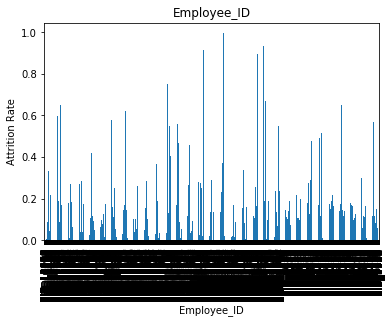

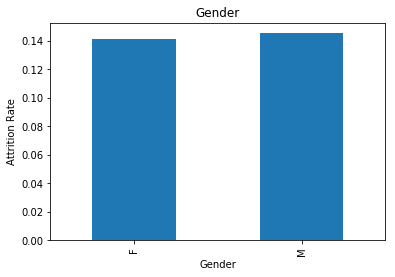

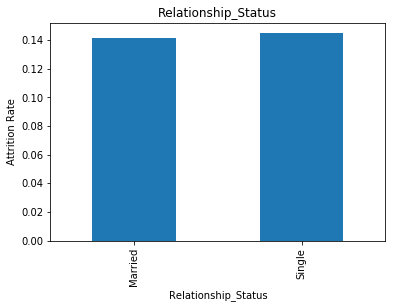

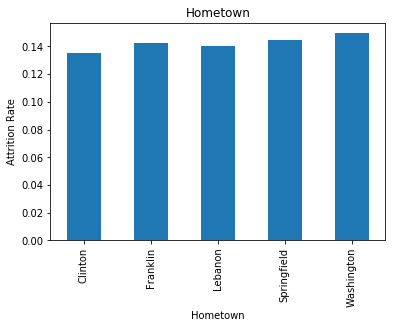

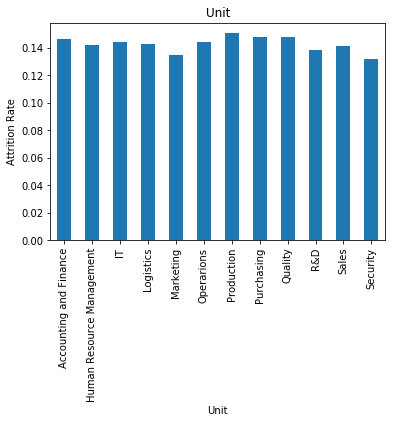

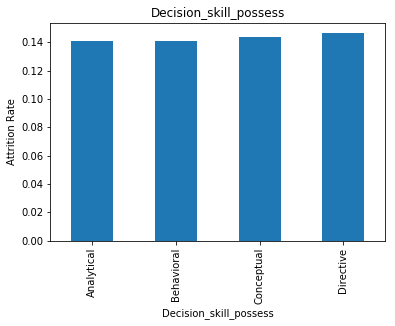

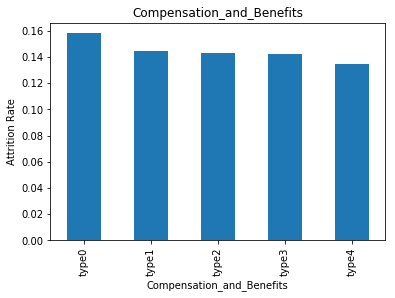

In [49]:
# Visualizing relationsip between categorical and target values
for feature in categorical_feature:
    data_copy = data.copy()
    data_copy.groupby(feature)['Attrition_rate'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Attrition Rate')
    plt.title(feature)
    plt.show()

In [23]:
# Handling Missing Values
#Listing Null values in Numerical data
numerical_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>=1 and data[feature].dtypes!='O' ]
for feature in numerical_with_nan:
    print(feature,np.round(data[feature].isnull().mean(),4),'%missing values')

Age 0.0589 %missing values
Time_of_service 0.0206 %missing values
Pay_Scale 0.0013 %missing values
Work_Life_balance 0.0016 %missing values
VAR2 0.0824 %missing values
VAR4 0.0937 %missing values


In [24]:
# Filling the missing values with median
for feature in numerical_with_nan:
    median_value = data[feature].median()
    data[feature+'nan'] = np.where(data[feature].isnull(),1,0)
    data[feature] = data[feature].fillna(median_value)
data[numerical_with_nan].isnull().sum()

Age                  0
Time_of_service      0
Pay_Scale            0
Work_Life_balance    0
VAR2                 0
VAR4                 0
dtype: int64

In [25]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,0,0,0,0,0,0
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,0,0,0,0,0
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,0,0,0,0,0,0
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,0,0,0,0,0,1
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,0,0,0,0,0,0


In [26]:
# Dropping Employee Id column as it donot contribute in prediction.
data = data.drop(columns=['Employee_ID'])

In [27]:
data.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,0,0,0,0,0,0
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,0,0,0,0,0
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,0,0,0,0,0,0
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,0,0,0,0,0,1
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,0,0,0,0,0,0


In [28]:
# Encoding categorical features
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
for feature in categorical_features:
    labels_ordered = data.groupby([feature])['Attrition_rate'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [29]:
data.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,0,42.0,4,0,1,0,3,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,0,0,0,0,0,0
1,1,24.0,3,1,4,1,1,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,0,0,0,0,0
2,0,58.0,3,0,2,3,3,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,0,0,0,0,0,0
3,0,26.0,3,1,0,2,0,4.0,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,0,0,0,0,0,1
4,0,31.0,1,0,4,1,3,5.0,4,62,1,3,2.0,0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,0,0,0,0,0,0


# Feature Engineering

In [30]:
# Seperating X and y 
y = data['Attrition_rate']
X = data.drop(columns=['Attrition_rate'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3179BD278>,
      dtype=object)

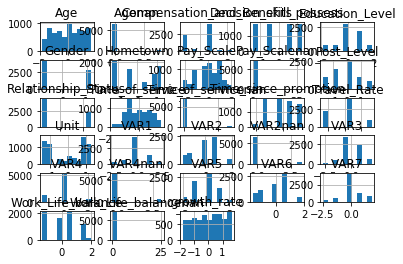

In [31]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pd.DataFrame(pt.fit_transform(X))
X_transformed.columns = X.columns
X_transformed.hist()

In [32]:
X_transformed.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,-0.837560,0.308688,0.756389,-0.740724,-0.345328,-1.405875,1.275129,-0.950484,1.380164,-0.877307,0.353132,-1.664949,0.462420,0.647641,0.615502,1.089162,0.800426,1.971756,0.170770,1.229876,-1.653942,-0.273477,-0.250076,-0.144926,-0.03588,-0.039672,-0.299722,-0.321566
1,1.193944,-1.245434,-0.245378,1.350030,1.227741,-0.883214,-0.374574,-0.760048,1.380164,-0.675586,-1.320222,0.236582,-0.039187,0.647641,1.346303,-0.144604,-1.013132,-0.464671,0.170770,0.195086,-1.653942,-0.273477,-0.250076,-0.144926,-0.03588,-0.039672,-0.299722,-0.321566
2,-0.837560,1.315889,-0.245378,-0.740724,0.299860,-0.208299,1.275129,1.245820,0.573276,0.283600,-1.320222,-0.645013,0.978686,0.647641,-1.313735,1.089162,-1.013132,-0.464671,2.282578,0.195086,0.758969,-0.273477,-0.250076,-0.144926,-0.03588,-0.039672,-0.299722,-0.321566
3,-0.837560,-1.037332,-0.245378,1.350030,-1.287828,-0.509483,-1.412933,-0.950484,0.573276,0.588518,0.353132,0.236582,0.978686,0.647641,-1.313735,-0.144604,-1.703525,-0.464671,0.170770,0.195086,-0.183823,-0.273477,-0.250076,-0.144926,-0.03588,-0.039672,-0.299722,3.109780
4,-0.837560,-0.563711,-1.884675,-0.740724,1.227741,-0.883214,1.275129,-0.760048,1.380164,0.946495,0.353132,0.236582,-1.858257,-1.298182,0.615502,-2.370799,0.800426,-0.464671,0.170770,-0.881706,0.758969,-1.361706,-0.250076,-0.144926,-0.03588,-0.039672,-0.299722,-0.321566


In [101]:
#Feature Selection
feature_set_model = SelectFromModel(Lasso(alpha=0.006,random_state=0))
feature_set_model.fit(X_transformed,y)

SelectFromModel(estimator=Lasso(alpha=0.006, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [102]:
feature_set_model.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [103]:
selected_feat = X_transformed.columns[(feature_set_model.get_support())]
print('total features: {}'.format((X_transformed.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_set_model.estimator_.coef_ == 0)))

total features: 28
selected features: 1
features with coefficients shrank to zero: 27


In [104]:
selected_feat

Index(['Unit'], dtype='object')

In [105]:
X_train = X_transformed[selected_feat]
X_train.head()

,Unit
0,-1.405875
1,-0.883214
2,-0.208299
3,-0.509483
4,-0.883214


In [106]:
# Splitting into training and validation 
x_train,x_valid,Y_train,Y_valid=train_test_split(X_train,y,test_size=0.3,random_state=0)

# Models

In [107]:
#Model 1
model_1 = LinearRegression()
model_1.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
pred = model_1.predict(x_valid)
score= 100*max(0,1-np.sqrt(mean_squared_error(Y_valid,pred)))

In [109]:
score

81.26141314310905

In [110]:
# Random Forest
model_2=RandomForestRegressor()
model_2.fit(x_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [111]:
pred = model_2.predict(x_valid)
score= 100*max(0,1-np.sqrt(mean_squared_error(Y_valid,pred)))
score

81.23005362097008

In [112]:
model_3=SVR(C=20,kernel='poly')
model_3.fit(x_train,Y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
pred = model_3.predict(x_valid)
score= 100*max(0,1-np.sqrt(mean_squared_error(Y_valid,pred)))
score

80.96643812458962

In [114]:
# Lasso Model
model_4=Lasso()
model_4.fit(x_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
pred = model_4.predict(x_valid)
score= 100*max(0,1-np.sqrt(mean_squared_error(Y_valid,pred)))
score

81.25826805787662

In [116]:
#KNN Algorithm
model_5= KNeighborsRegressor()  
model_5.fit(x_train, Y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [117]:
pred = model_5.predict(x_valid)
score= 100*max(0,1-np.sqrt(mean_squared_error(Y_valid,pred)))
score

79.75384956844529

In [118]:
# Decision Tree
model_6 = DecisionTreeRegressor()
model_6.fit(x_train, Y_train)
pred = model_6.predict(x_valid)
score= 100*max(0,1-np.sqrt(mean_squared_error(Y_valid,pred)))
score

81.23095363309186

In [102]:
# Performing Hyperparameter tuning for Random Forest
param_grid={'max_depth':range(0,3,1),'n_estimators':range(100,200,50)}
grid_search3 = RandomizedSearchCV(RandomForestRegressor(),param_grid,verbose=1,cv=10,n_jobs=-1)
grid_search3.fit(x_train,Y_train)

c:\users\cooldude\venv\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [103]:
grid_search3.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
grid_search_pred = grid_search3.predict(x_valid)
model_3_grid = 100*max(0,1-np.sqrt(mean_squared_error(grid_search_pred,Y_valid)))
model_3_grid

81.26009400495535

In [137]:
#Performing Hyper-parameter tuning for SVM
param_grid = {'C': range(60,70,5), 'gamma': [1,1e-6,1e-7,1e-8],'kernel': ['rbf', 'linear']}
grid_search1 = RandomizedSearchCV(SVR(),param_grid,verbose=1,cv=5,n_jobs=-1,refit=True)
grid_search1.fit(x_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': range(60, 70, 5),
                                        'gamma': [1, 1e-06, 1e-07, 1e-08],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [138]:
grid_search1.best_estimator_

SVR(C=65, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [139]:
grid_search_pred = grid_search1.predict(x_valid)
model_2_grid = 100*max(0,1-np.sqrt(mean_squared_error(grid_search_pred,Y_valid)))
model_2_grid

80.9678290156534

In [215]:
#Performing Hyper-parameter tuning for KNN
param_grid = {'n_neighbors': range(15,21,2),'leaf_size':range(31,38,1)}
grid_search3 = RandomizedSearchCV(KNeighborsRegressor(),param_grid,verbose=1,cv=15,n_jobs=-1,refit=True)
grid_search3.fit(x_train,Y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'leaf_size': range(31, 38),
                                        'n_neighbors': range(15, 21, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [216]:
grid_search3.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=37, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [217]:
grid_search_pred = grid_search3.predict(x_valid)
model_3_grid = 100*max(0,1-np.sqrt(mean_squared_error(grid_search_pred,Y_valid)))
model_3_grid

80.78803288800546

#### After running different models, it appears that the highest accuracy on training data is achieved by Linear Regression Model.

## Analysing the Testing Data

In [142]:
test_data=pd.read_csv("Customer_attrition/Test.csv")

In [143]:
test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [144]:
# Printing number of records in the testing data
print('There are {} rows and {} columns in testing data.'.format(test_data.shape[0],test_data.shape[1]))

There are 3000 rows and 23 columns in testing data.


In [145]:
X_test=test_data.copy()
#Investigating nan values in data
features_with_nan = [feature for feature in X_test.columns if X_test[feature].isnull().sum()>=1]
for feature in features_with_nan:
    print(feature,np.round(X_test[feature].isnull().mean(),4),'%missing values')

Age 0.0537 %missing values
Time_of_service 0.0173 %missing values
Pay_Scale 0.001 %missing values
Work_Life_balance 0.0017 %missing values
VAR2 0.0723 %missing values
VAR4 0.0993 %missing values


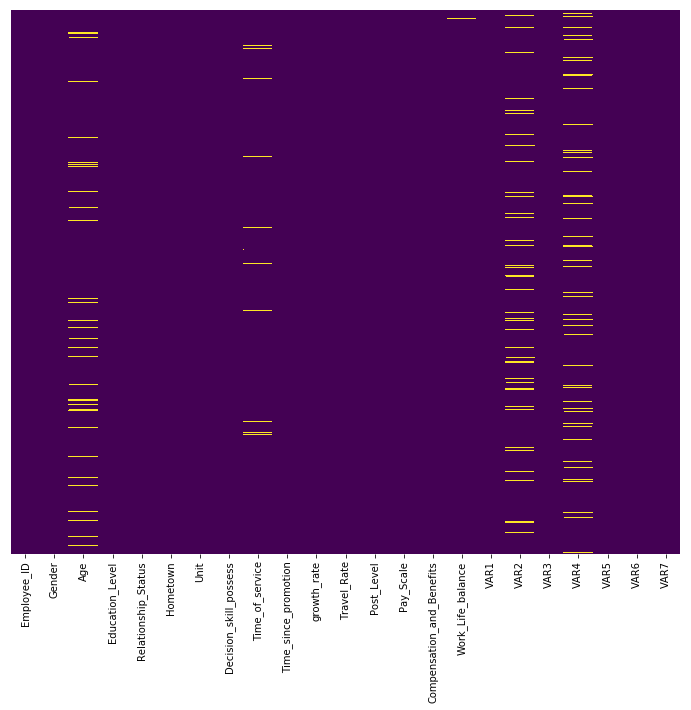

In [146]:
#Visualizing the null values in test data
plt.figure(figsize=(12,10))
sns.heatmap(X_test.isnull(),cbar=False,yticklabels=False,cmap="viridis")

In [147]:
#Handlling missing values in numerical data
numerical_with_nan = [feature for feature in X_test.columns if X_test[feature].isnull().sum()>=1 and X_test[feature].dtype!='O']
for feature in numerical_with_nan:
    print(feature,np.round(X_test[feature].isnull().mean(),4),'%missing values')

Age 0.0537 %missing values
Time_of_service 0.0173 %missing values
Pay_Scale 0.001 %missing values
Work_Life_balance 0.0017 %missing values
VAR2 0.0723 %missing values
VAR4 0.0993 %missing values


In [148]:
# Filling the missing values
for feature in numerical_with_nan:
    median_value = X_test[feature].median()
    X_test[feature +'nan'] = np.where(X_test[feature].isnull(),1,0)
    X_test[feature] = X_test[feature].fillna(median_value)
X_test[numerical_with_nan].isnull().sum()

Age                  0
Time_of_service      0
Pay_Scale            0
Work_Life_balance    0
VAR2                 0
VAR4                 0
dtype: int64

In [151]:
X_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,0,0,0,0,0
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,0,0,0,0,0
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3,0,0,0,0,0,0
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,0,0,0,0,0
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4,0,0,0,0,0,0


In [153]:
# Dropping Employee Id column as it donot contribute in prediction.
X_test = X_test.drop(columns=['Employee_ID'])

In [156]:
#Encoding Categorical Data
categorical_features = [feature for feature in X_test.columns if X_test[feature].dtype=='O']
le = LabelEncoder()
for feature in categorical_features:
    X_test[feature] = le.fit_transform(X_test[feature])
X_test.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,0,32.0,5,1,3,9,2,7.0,4,30,1,5,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0,0,0,0,0,0
1,1,65.0,2,1,2,2,3,41.0,2,72,1,1,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,0,0,0,0,0
2,1,52.0,3,0,3,10,3,21.0,3,25,0,1,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3,0,0,0,0,0,0
3,1,50.0,5,1,4,4,0,11.0,4,28,1,1,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,0,0,0,0,0
4,0,44.0,3,0,1,9,2,12.0,4,47,1,3,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C320C9D0B8>,
      dtype=object)

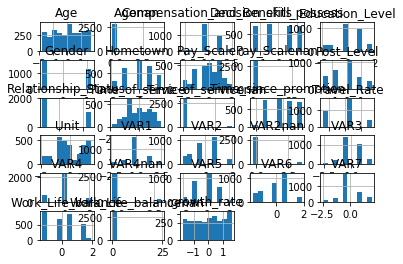

In [163]:
# Fetaure Engineering test data
pt = PowerTransformer(method='yeo-johnson')
X_test_transformed = pd.DataFrame(pt.fit_transform(X_test))
X_test_transformed.columns = X_test.columns
X_test_transformed.hist()

In [164]:
X_test_transformed.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Agenan,Time_of_servicenan,Pay_Scalenan,Work_Life_balancenan,VAR2nan,VAR4nan
0,-0.857969,-0.510487,1.832431,1.353832,0.705070,1.118052,0.526023,-0.458469,1.354317,-1.049315,0.332884,1.720867,-0.999080,-0.495306,-1.291001,-0.116121,-1.036160,-0.491620,0.143047,-2.030856,0.738911,0.849705,-0.238139,-0.132812,-0.031639,-0.040859,-0.279237,-0.332097
1,1.165543,1.713405,-1.165662,1.353832,-0.134505,-0.866675,1.290081,1.934083,-0.319829,1.503352,0.332884,-1.623898,-2.234102,-0.495306,-1.291001,1.157396,-1.036160,0.684304,-1.734467,-0.881263,0.738911,-1.363045,-0.238139,-0.132812,-0.031639,-0.040859,-0.279237,-0.332097
2,1.165543,0.949260,-0.288238,-0.738644,0.705070,1.327473,1.290081,0.879006,0.537071,-1.401384,-1.342662,-1.623898,0.931645,0.923594,-1.291001,1.157396,-0.261449,0.684304,0.143047,-2.030856,1.853447,-0.259305,-0.238139,-0.132812,-0.031639,-0.040859,-0.279237,-0.332097
3,1.165543,0.821321,1.832431,1.353832,1.530541,-0.156702,-1.409797,0.036480,1.354317,-1.188229,0.332884,-1.623898,-1.850740,-2.753506,1.324758,-0.116121,-0.261449,0.684304,0.143047,-0.881263,0.738911,-0.259305,-0.238139,-0.132812,-0.031639,-0.040859,-0.279237,-0.332097
4,-0.857969,0.416979,-0.288238,-0.738644,-0.993432,1.118052,0.526023,0.140400,1.354317,0.052788,0.332884,0.237577,-1.850740,-0.495306,1.324758,1.157396,1.961852,0.684304,0.143047,-0.881263,-0.216509,0.849705,-0.238139,-0.132812,-0.031639,-0.040859,-0.279237,-0.332097


In [174]:
# According feature selection in training data, 'Unit' column was selected for predicting 'Attrition Rate'. Therefore, using that column in test data as well.
X_test_data = pd.DataFrame(X_test_transformed.Unit)

In [168]:
# Final Model
linear_model = LinearRegression()
linear_model.fit(X_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
# Final Predictions
final_predictions = linear_model.predict(X_test_data)

In [177]:
final_predictions

array([0.19651418, 0.18384296, 0.1978512 , ..., 0.18626358, 0.18384296,
       0.1978512 ])

In [178]:
# Orgainsing Final Predictions
predictions_result=pd.DataFrame(final_predictions)
predictions_result.columns=["Attrition_rate"]
predictions_result1=pd.DataFrame(test_data["Employee_ID"])
predictions_result1.columns=["Employee_ID"]
predictions_result=pd.concat([predictions_result1,predictions_result],axis=1)
predictions_result.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.196514
1,EID_9658,0.183843
2,EID_22203,0.197851
3,EID_7652,0.188376
4,EID_6516,0.196514
